In [5]:
import ROOT
%run ./toolkit/dilution_tools.ipynb

In [6]:
rootdir="/volatile/clas12/users/gmat/clas12analysis.sidis.data/rgc/sidisdvcs/test8.3.2/"

In [7]:
df_out = extract_dilution_factors(rootdir=rootdir,
                                  cookType="TBT",
                                  ft="Off",
                                  debug=False)

NH3 fcupgated calculated
ND3 fcupgated calculated
C fcupgated calculated
CH fcupgated calculated
MT fcupgated calculated
NH3 Runs: [16983, 16990, 16992, 17001, 17015, 17019, 17076, 17088, 17092, 17215]
ND3 Runs: [16889, 16911, 16912, 16913, 16922]
C Runs: [16874, 16877, 17138]
CH Runs: [17118]
MT Runs: [16979]


In [8]:

df_out

,xmin,xmax,Q2min,Q2max,df_NH3,df_err_NH3,df_ND3,df_err_ND3,N_NH3,N_ND3,...,fcupgated_CH,fcupgated_MT,fcupgated_F,n_NH3,n_ND3,n_C,n_CH,n_MT,n_F,cookType
0,0.10,0.15,1.0969,1.3094,0.193626,0.004759,0.300484,0.003852,483240.0,322088.0,...,64819.997838,64223.766528,0,0.722927,0.842995,0.851493,0.864995,0.008128,0,TBT
1,0.10,0.15,1.3094,1.5632,0.182607,0.002024,0.291235,0.001637,2783712.0,1904970.0,...,64819.997838,64223.766528,0,4.164431,4.985845,4.908593,4.931780,0.045404,0,TBT
2,0.10,0.15,1.5632,1.8661,0.177049,0.001773,0.286520,0.001434,3670591.0,2506628.0,...,64819.997838,64223.766528,0,5.491202,6.560554,6.525730,6.520796,0.059184,0,TBT
3,0.10,0.15,1.8661,2.2277,0.167500,0.002482,0.279204,0.002002,1925733.0,1310071.0,...,64819.997838,64223.766528,0,2.880895,3.428826,3.450000,3.415366,0.030861,0,TBT
4,0.10,0.15,2.2277,2.6594,0.155906,0.011142,0.269405,0.008981,97608.0,66413.0,...,64819.997838,64223.766528,0,0.146022,0.173822,0.178511,0.174761,0.001573,0,TBT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,0.65,0.70,6.4475,7.6969,0.220731,0.034452,0.295085,0.029698,8963.0,5730.0,...,64819.997838,64223.766528,0,0.013409,0.014997,0.014669,0.015319,0.000156,0,TBT
57,0.65,0.70,7.6969,9.1884,0.216730,0.026185,0.292984,0.022488,15157.0,9489.0,...,64819.997838,64223.766528,0,0.022675,0.024835,0.025763,0.026797,0.000265,0,TBT
58,0.65,0.70,9.1884,10.9689,0.232725,0.037432,0.306346,0.032222,7031.0,4317.0,...,64819.997838,64223.766528,0,0.010518,0.011299,0.011854,0.012542,0.000109,0,TBT
59,0.70,0.75,7.6969,9.1884,0.241580,0.089716,0.312808,0.077481,1160.0,711.0,...,64819.997838,64223.766528,0,0.001735,0.001861,0.001955,0.002083,0.000062,0,TBT


In [8]:
len(df_out.df_NH3.to_list())

75

In [9]:
df_out.to_csv("/work/clas12/users/gmat/rgc_dilution_factor_v4.csv")

In [38]:
np.unique(df_out.Q2min)

array([1.0969, 1.3094, 1.5632, 1.8661, 2.2277, 2.6594, 3.1747, 3.7899,
       4.5243, 5.4009, 6.4475, 7.6969, 9.1884])

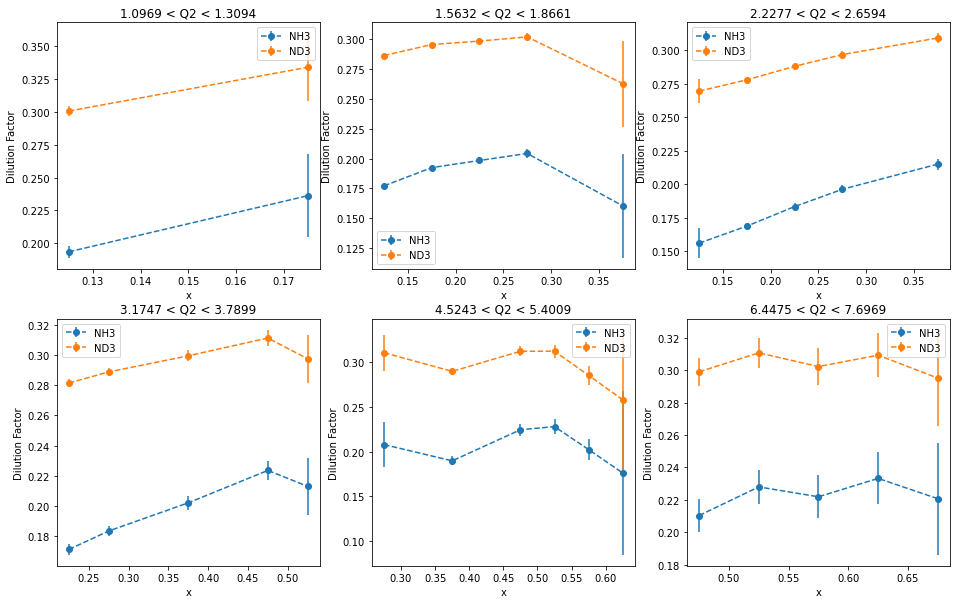

In [10]:
fig,axs=plt.subplots(2,3,figsize=(16,10))
for i,idx in enumerate([0,2,4,6,8,10]):
    r=int(np.floor(i/3))
    c=int(i%3)
    q2min = np.unique(df_out.Q2min)[idx]
    q2max = np.unique(df_out.Q2max)[idx]
    df_tmp = df_out[df_out.Q2min==q2min]
    #if((r==0)&(c==2) or (r==1)&(c==0)):
    #    axs[r,c].errorbar((df_tmp.xmin[1:-1]+df_tmp.xmax[1:-1])/2,df_tmp.df_NH3[1:-1],yerr=df_tmp.df_err_NH3[1:-1],fmt="o--",label="NH3")
    #    axs[r,c].errorbar((df_tmp.xmin[1:-1]+df_tmp.xmax[1:-1])/2,df_tmp.df_ND3[1:-1],yerr=df_tmp.df_err_ND3[1:-1],fmt="o--",label="ND3")
    #else:
    axs[r,c].errorbar((df_tmp.xmin+df_tmp.xmax)/2,df_tmp.df_NH3,yerr=df_tmp.df_err_NH3,fmt="o--",label="NH3")
    axs[r,c].errorbar((df_tmp.xmin+df_tmp.xmax)/2,df_tmp.df_ND3,yerr=df_tmp.df_err_ND3,fmt="o--",label="ND3")
    axs[r,c].set_xlabel("x")
    axs[r,c].set_ylabel("Dilution Factor")
    axs[r,c].set_title("{} < Q2 < {}".format(q2min,q2max))
    axs[r,c].legend()

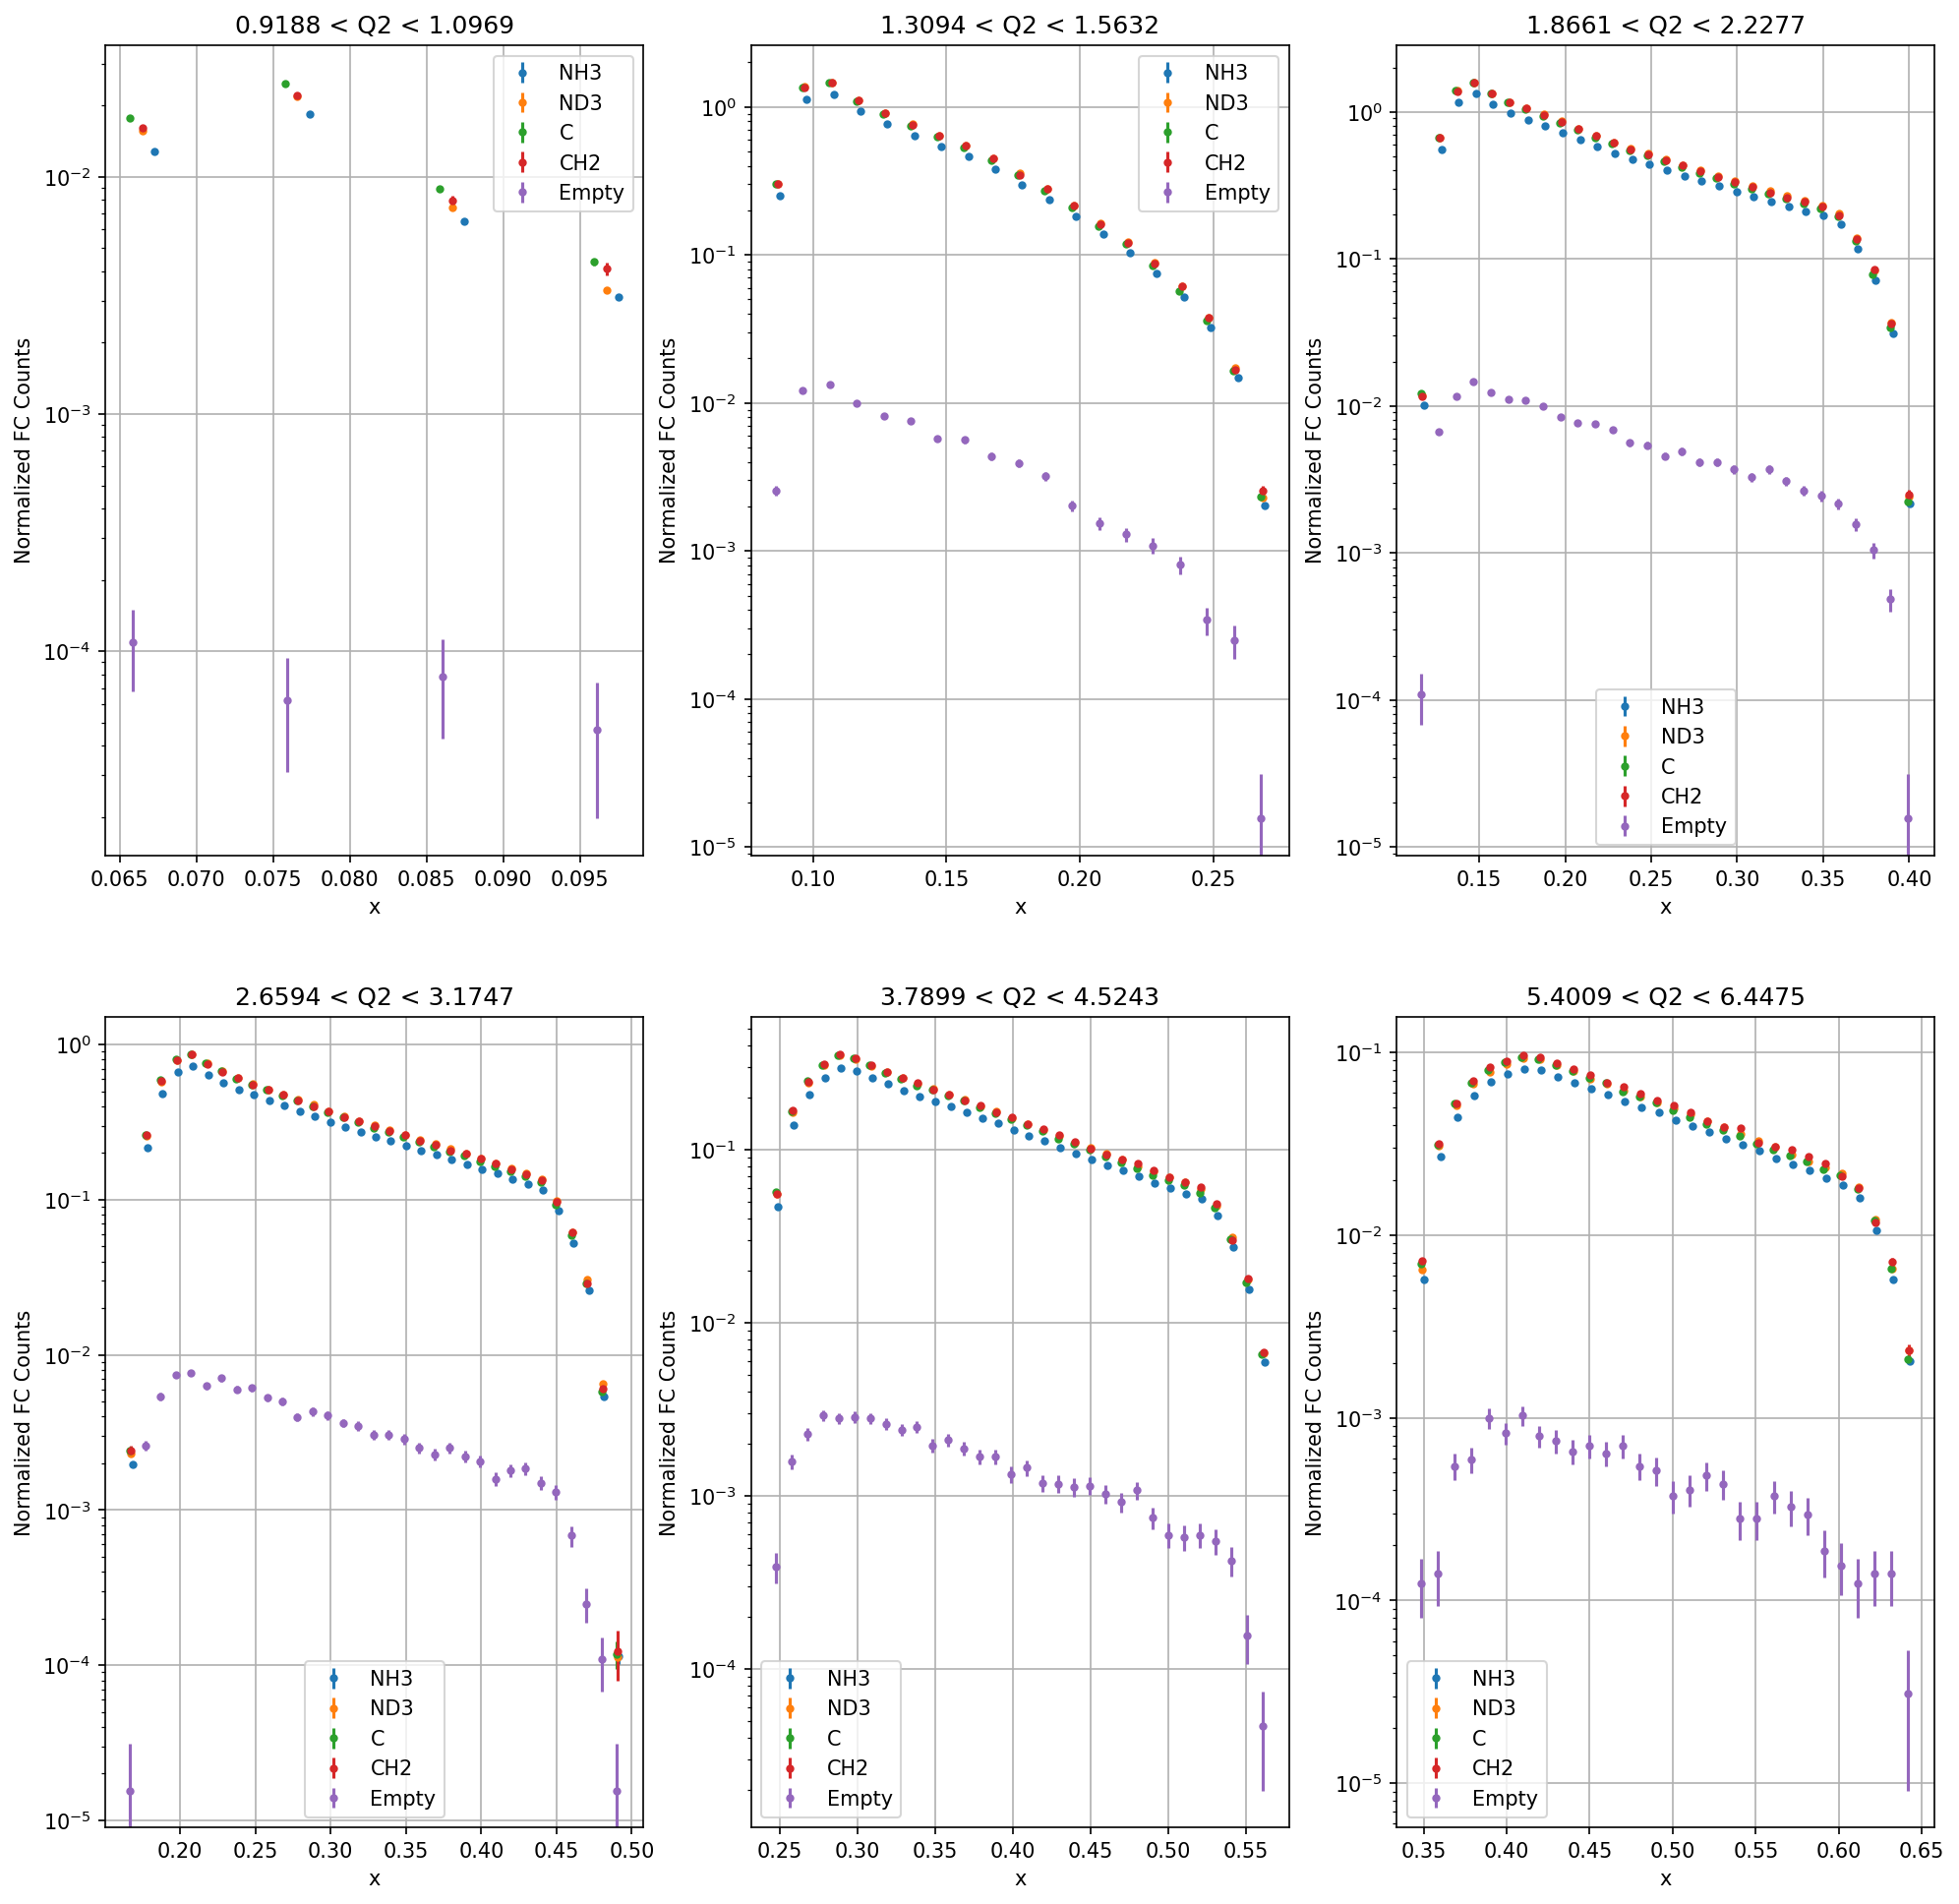

In [24]:
fig,axs=plt.subplots(2,3,figsize=(16,16),dpi=150)
for i,idx in enumerate([0,2,4,6,8,10]):
    r=int(np.floor(i/3))
    c=int(i%3)
    q2min = np.unique(df_out.Q2min)[idx]
    q2max = np.unique(df_out.Q2max)[idx]
    df_tmp = df_out[df_out.Q2min==q2min]
    axs[r,c].errorbar((df_tmp.xmin+df_tmp.xmax)/2+0.0016,df_tmp.n_NH3,yerr=np.sqrt(df_tmp.N_NH3)/df_tmp.fcupgated_NH3,fmt=".",label="NH3")
    axs[r,c].errorbar((df_tmp.xmin+df_tmp.xmax)/2+0.0008,df_tmp.n_ND3,yerr=np.sqrt(df_tmp.N_ND3)/df_tmp.fcupgated_ND3,fmt=".",label="ND3")
    axs[r,c].errorbar((df_tmp.xmin+df_tmp.xmax)/2,df_tmp.n_C,yerr=np.sqrt(df_tmp.N_C)/df_tmp.fcupgated_C,fmt=".",label="C")
    axs[r,c].errorbar((df_tmp.xmin+df_tmp.xmax)/2+0.0008,df_tmp.n_CH,yerr=np.sqrt(df_tmp.N_CH)/df_tmp.fcupgated_CH,fmt=".",label="CH2")
    axs[r,c].errorbar((df_tmp.xmin+df_tmp.xmax)/2+0.00016,df_tmp.n_MT,yerr=np.sqrt(df_tmp.N_MT)/df_tmp.fcupgated_MT,fmt=".",label="Empty")
    axs[r,c].set_xlabel("x")
    axs[r,c].set_ylabel("Normalized FC Counts")
    axs[r,c].set_title("{} < Q2 < {}".format(q2min,q2max))
    axs[r,c].legend()
    axs[r,c].set_yscale("log")
    axs[r,c].grid()

In [96]:
df_out_debug = extract_dilution_factors(rootdir=rootdir,
                                  cookType="TBT",
                                  ft="Off",
                                  debug=True)

ND3 fcupgated calculated
C fcupgated calculated
CH fcupgated calculated
MT fcupgated calculated
NH3 Runs: [16983, 16990, 16992, 17001, 17015, 17019, 17076, 17088, 17092]
ND3 Runs: [16889, 16911, 16912, 16913, 16922]
C Runs: [16874, 16877, 17138]
CH Runs: [17118]
MT Runs: [16979]


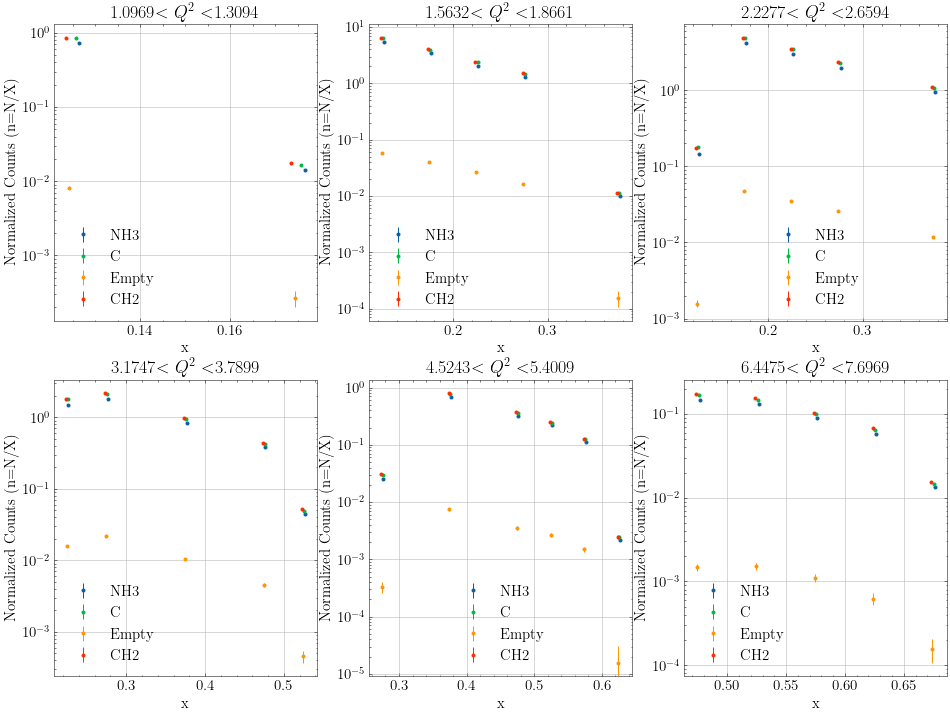

In [32]:
fig,axs=plt.subplots(2,3,figsize=(16,12))
for i,idx in enumerate([0,2,4,6,8,10]):
    r=int(np.floor(i/3))
    c=int(i%3)
    q2min = np.unique(df_out.Q2min)[idx]
    q2max = np.unique(df_out.Q2max)[idx]
    df_tmp = df_out[df_out.Q2min==q2min]
    axs[r,c].errorbar((df_tmp.xmin+df_tmp.xmax)/2+0.0015,df_tmp.n_NH3,yerr=np.sqrt(df_tmp.N_NH3)/df_tmp.fcupgated_NH3,fmt=".",label="NH3")
    axs[r,c].errorbar((df_tmp.xmin+df_tmp.xmax)/2+0.00075,df_tmp.n_C,yerr=np.sqrt(df_tmp.N_C)/df_tmp.fcupgated_C,fmt=".",label="C")
    axs[r,c].errorbar((df_tmp.xmin+df_tmp.xmax)/2-0.00075,df_tmp.n_MT,yerr=np.sqrt(df_tmp.N_MT)/df_tmp.fcupgated_MT,fmt=".",label="Empty")
    axs[r,c].errorbar((df_tmp.xmin+df_tmp.xmax)/2-0.0015,df_tmp.n_CH,yerr=np.sqrt(df_tmp.N_CH)/df_tmp.fcupgated_CH,fmt=".",label="CH2")
    axs[r,c].set_xlabel("x")
    axs[r,c].set_ylabel("Normalized Counts (n=N/X)")
    axs[r,c].set_title("{}".format(q2min)+"$ < Q^{2} < $"+"{}".format(q2max))
    axs[r,c].legend()
    axs[r,c].set_yscale("log")
    axs[r,c].grid()

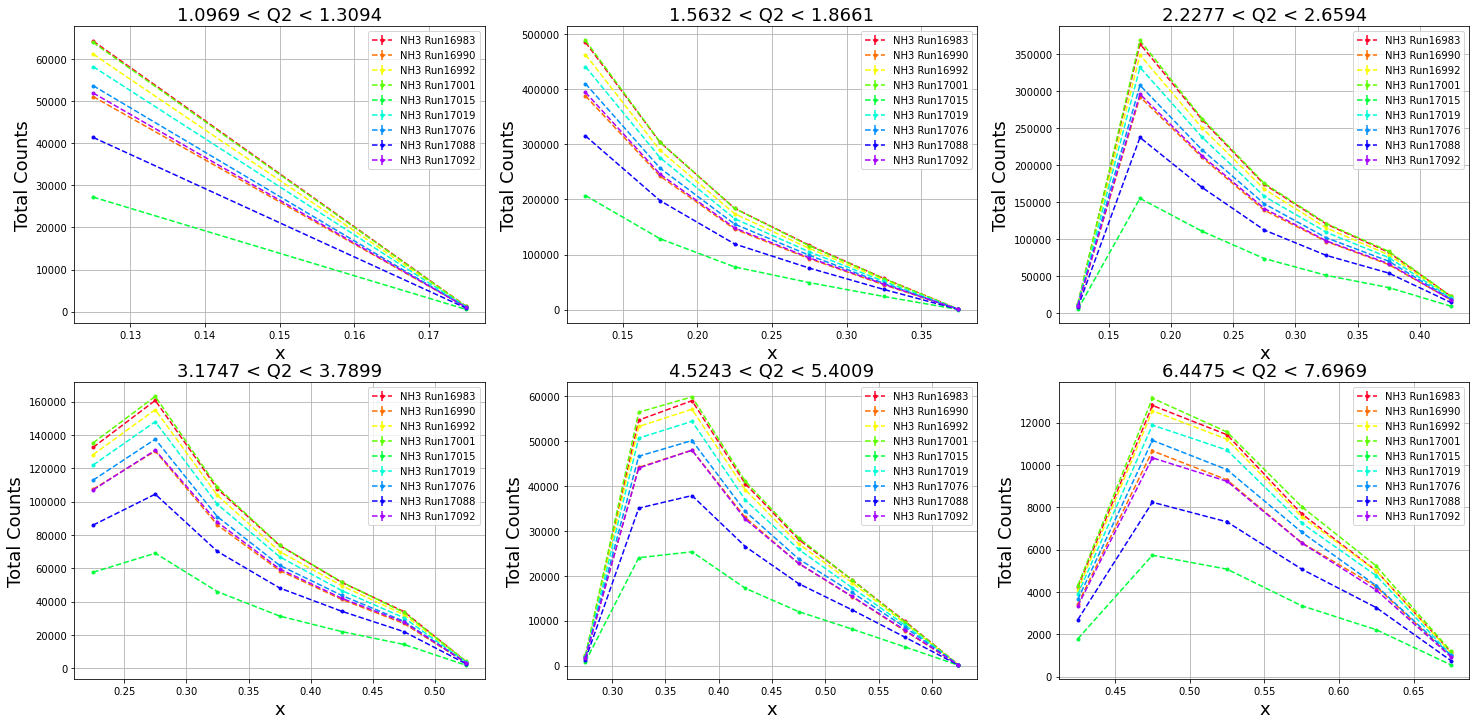

In [116]:
fig,axs=plt.subplots(2,3,figsize=(25,12))
NH3_runs = [16983,16990,16992,17001,17015,17019,17076,17088,17092]
cm = plt.get_cmap('gist_rainbow')
NUM_COLORS=len(NH3_runs)
for i,idx in enumerate([0,2,4,6,8,10]):
    r=int(np.floor(i/3))
    c=int(i%3)
    axs[r,c].set_prop_cycle(color=[cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])
    q2min = np.unique(df_out.Q2min)[idx]
    q2max = np.unique(df_out.Q2max)[idx]
    df_tmp = df_out_debug[df_out.Q2min==q2min]
    for irun,run in enumerate(NH3_runs):
        axs[r,c].errorbar((df_tmp.xmin+df_tmp.xmax)/2,df_tmp["N_NH3_{}".format(irun)],yerr=np.sqrt(df_tmp["N_NH3_{}".format(irun)]),fmt=".--",label="NH3 Run{}".format(run))
    axs[r,c].set_xlabel("x",fontsize=18)
    axs[r,c].set_ylabel("Total Counts",fontsize=18)
    axs[r,c].set_title("{} < Q2 < {}".format(q2min,q2max),fontsize=18)
    axs[r,c].legend()
    axs[r,c].grid()

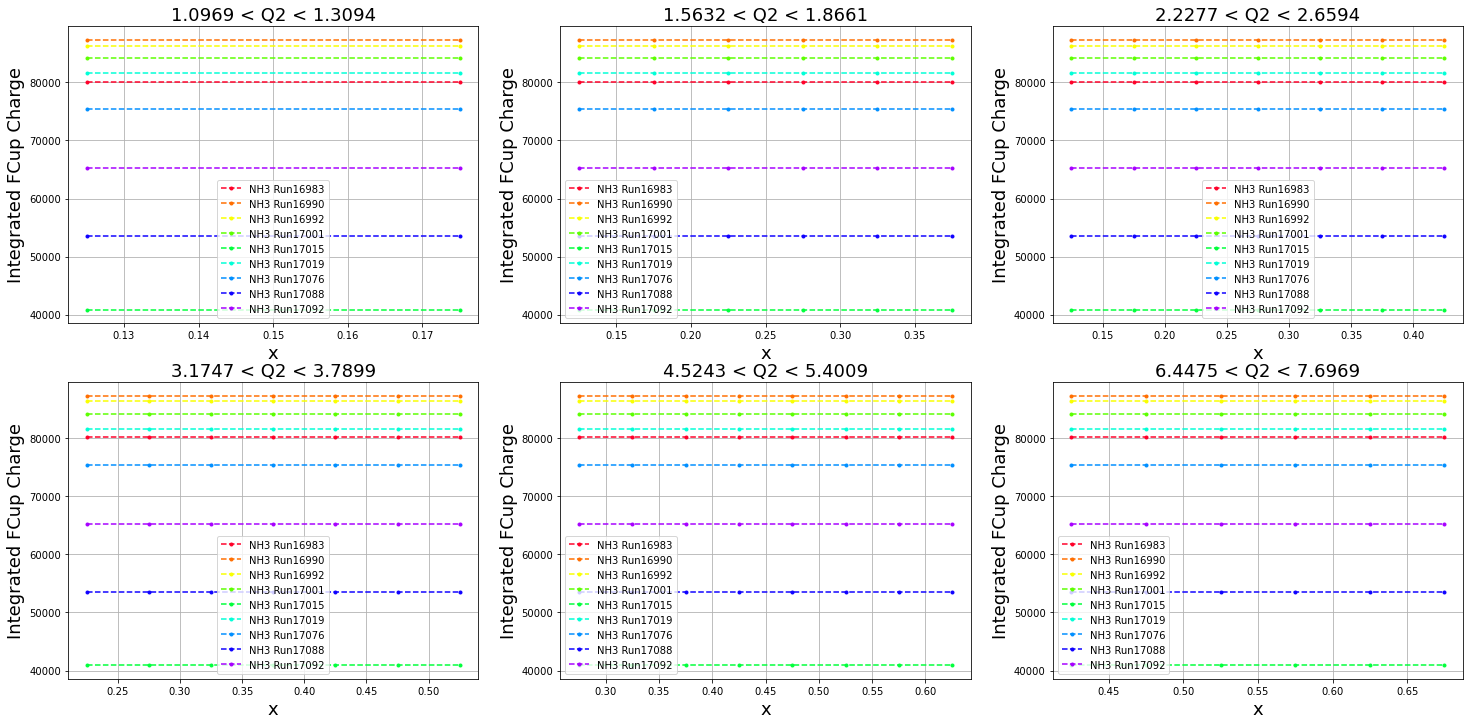

In [119]:
fig,axs=plt.subplots(2,3,figsize=(25,12))
NH3_runs = [16983,16990,16992,17001,17015,17019,17076,17088,17092]
cm = plt.get_cmap('gist_rainbow')
NUM_COLORS=len(NH3_runs)
for i,idx in enumerate([0,2,4,6,8,10]):
    r=int(np.floor(i/3))
    c=int(i%3)
    axs[r,c].set_prop_cycle(color=[cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])
    q2min = np.unique(df_out.Q2min)[idx]
    q2max = np.unique(df_out.Q2max)[idx]
    df_tmp = df_out_debug[df_out.Q2min==q2min]
    for irun,run in enumerate(NH3_runs):
        axs[r,c].errorbar((df_tmp.xmin+df_tmp.xmax)/2,df_tmp["fcupgated_NH3_{}".format(irun)],fmt=".--",label="NH3 Run{}".format(run))
    axs[r,c].set_xlabel("x",fontsize=18)
    axs[r,c].set_ylabel("Integrated FCup Charge",fontsize=18)
    axs[r,c].set_title("{} < Q2 < {}".format(q2min,q2max),fontsize=18)
    axs[r,c].legend()
    axs[r,c].grid()

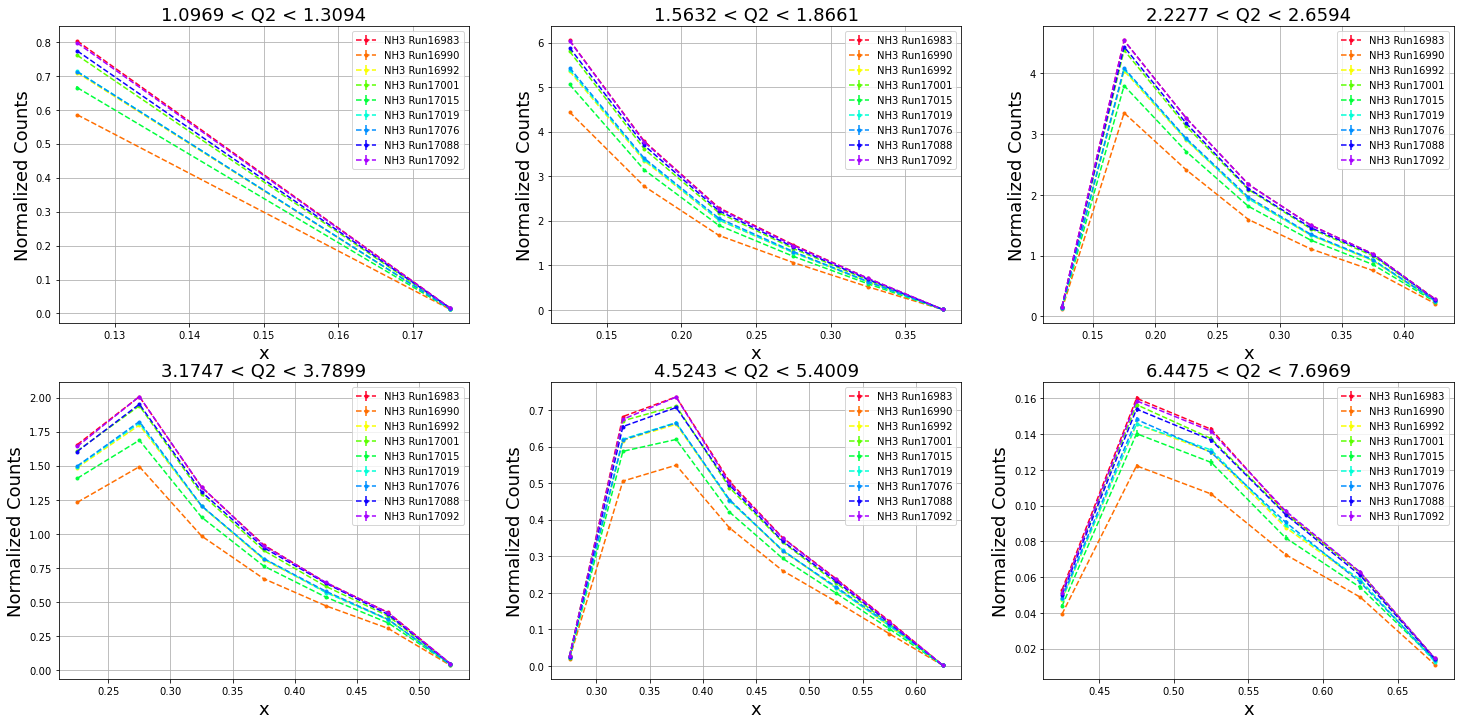

In [121]:
fig,axs=plt.subplots(2,3,figsize=(25,12))
NH3_runs = [16983,16990,16992,17001,17015,17019,17076,17088,17092]
cm = plt.get_cmap('gist_rainbow')
NUM_COLORS=len(NH3_runs)
for i,idx in enumerate([0,2,4,6,8,10]):
    r=int(np.floor(i/3))
    c=int(i%3)
    axs[r,c].set_prop_cycle(color=[cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])
    q2min = np.unique(df_out.Q2min)[idx]
    q2max = np.unique(df_out.Q2max)[idx]
    df_tmp = df_out_debug[df_out.Q2min==q2min]
    for irun,run in enumerate(NH3_runs):
        axs[r,c].errorbar((df_tmp.xmin+df_tmp.xmax)/2,df_tmp["n_NH3_{}".format(irun)],yerr=np.sqrt(df_tmp["N_NH3_{}".format(irun)])/df_tmp["fcupgated_NH3_{}".format(irun)],fmt=".--",label="NH3 Run{}".format(run))
    axs[r,c].set_xlabel("x",fontsize=18)
    axs[r,c].set_ylabel("Normalized Counts",fontsize=18)
    axs[r,c].set_title("{} < Q2 < {}".format(q2min,q2max),fontsize=18)
    axs[r,c].legend()
    axs[r,c].grid()

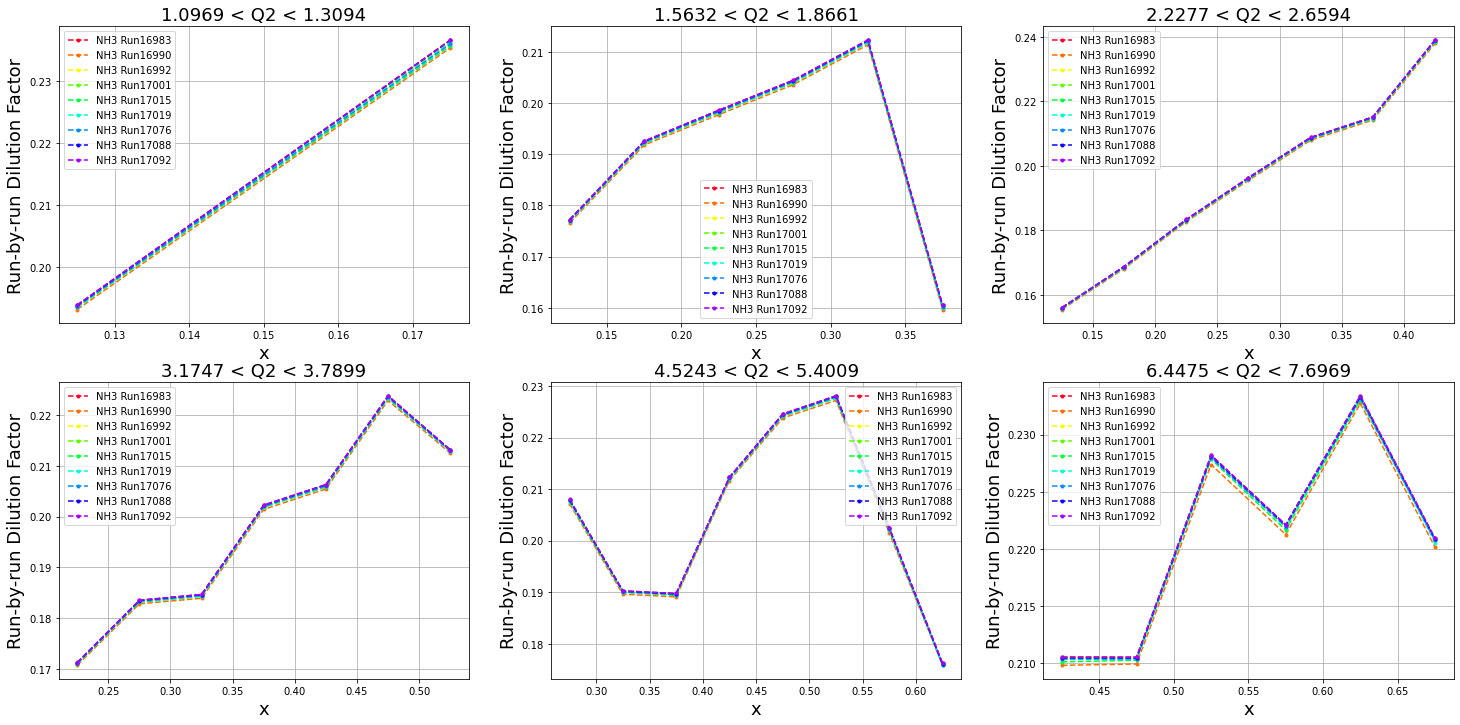

In [122]:
fig,axs=plt.subplots(2,3,figsize=(25,12))
NH3_runs = [16983,16990,16992,17001,17015,17019,17076,17088,17092]
cm = plt.get_cmap('gist_rainbow')
NUM_COLORS=len(NH3_runs)
for i,idx in enumerate([0,2,4,6,8,10]):
    r=int(np.floor(i/3))
    c=int(i%3)
    axs[r,c].set_prop_cycle(color=[cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])
    q2min = np.unique(df_out.Q2min)[idx]
    q2max = np.unique(df_out.Q2max)[idx]
    df_tmp = df_out_debug[df_out.Q2min==q2min]
    for irun,run in enumerate(NH3_runs):
        axs[r,c].errorbar((df_tmp.xmin+df_tmp.xmax)/2,df_tmp["df_NH3_{}".format(irun)],fmt=".--",label="NH3 Run{}".format(run))
    axs[r,c].set_xlabel("x",fontsize=18)
    axs[r,c].set_ylabel("Run-by-run Dilution Factor",fontsize=18)
    axs[r,c].set_title("{} < Q2 < {}".format(q2min,q2max),fontsize=18)
    axs[r,c].legend()
    axs[r,c].grid()

# Plotting from existing Dilution Factor CSV

In [11]:
df=pd.read_csv("/work/clas12/users/gmat/rgc_dilution_factor_v4.csv")

In [12]:
# Getting the deuteron tables
%run ./toolkit/asym_tools_2d.ipynb

In [44]:
fNH3_harut = np.round(interp(f_NH3,0.5*(df.xmin+df.xmax)),6)
fND3_harut = np.round(interp(f_ND3,0.5*(df.xmin+df.xmax)),6)

In [46]:
df.df_ND3=df.df_NH3/fNH3_harut*fND3_harut
df.df_err_ND3=df.df_err_NH3/fNH3_harut*fND3_harut

In [14]:
plt.style.use('science')

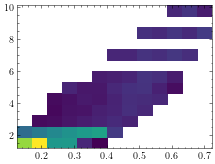

In [22]:
plt.hist2d(0.5*(df.xmin+df.xmax),0.5*(df.Q2min+df.Q2max),weights=df.df_NH3,cmin=0.001,
           bins=[len(np.unique(df.xmin)),len(np.unique(df.Q2min))])
plt.show()

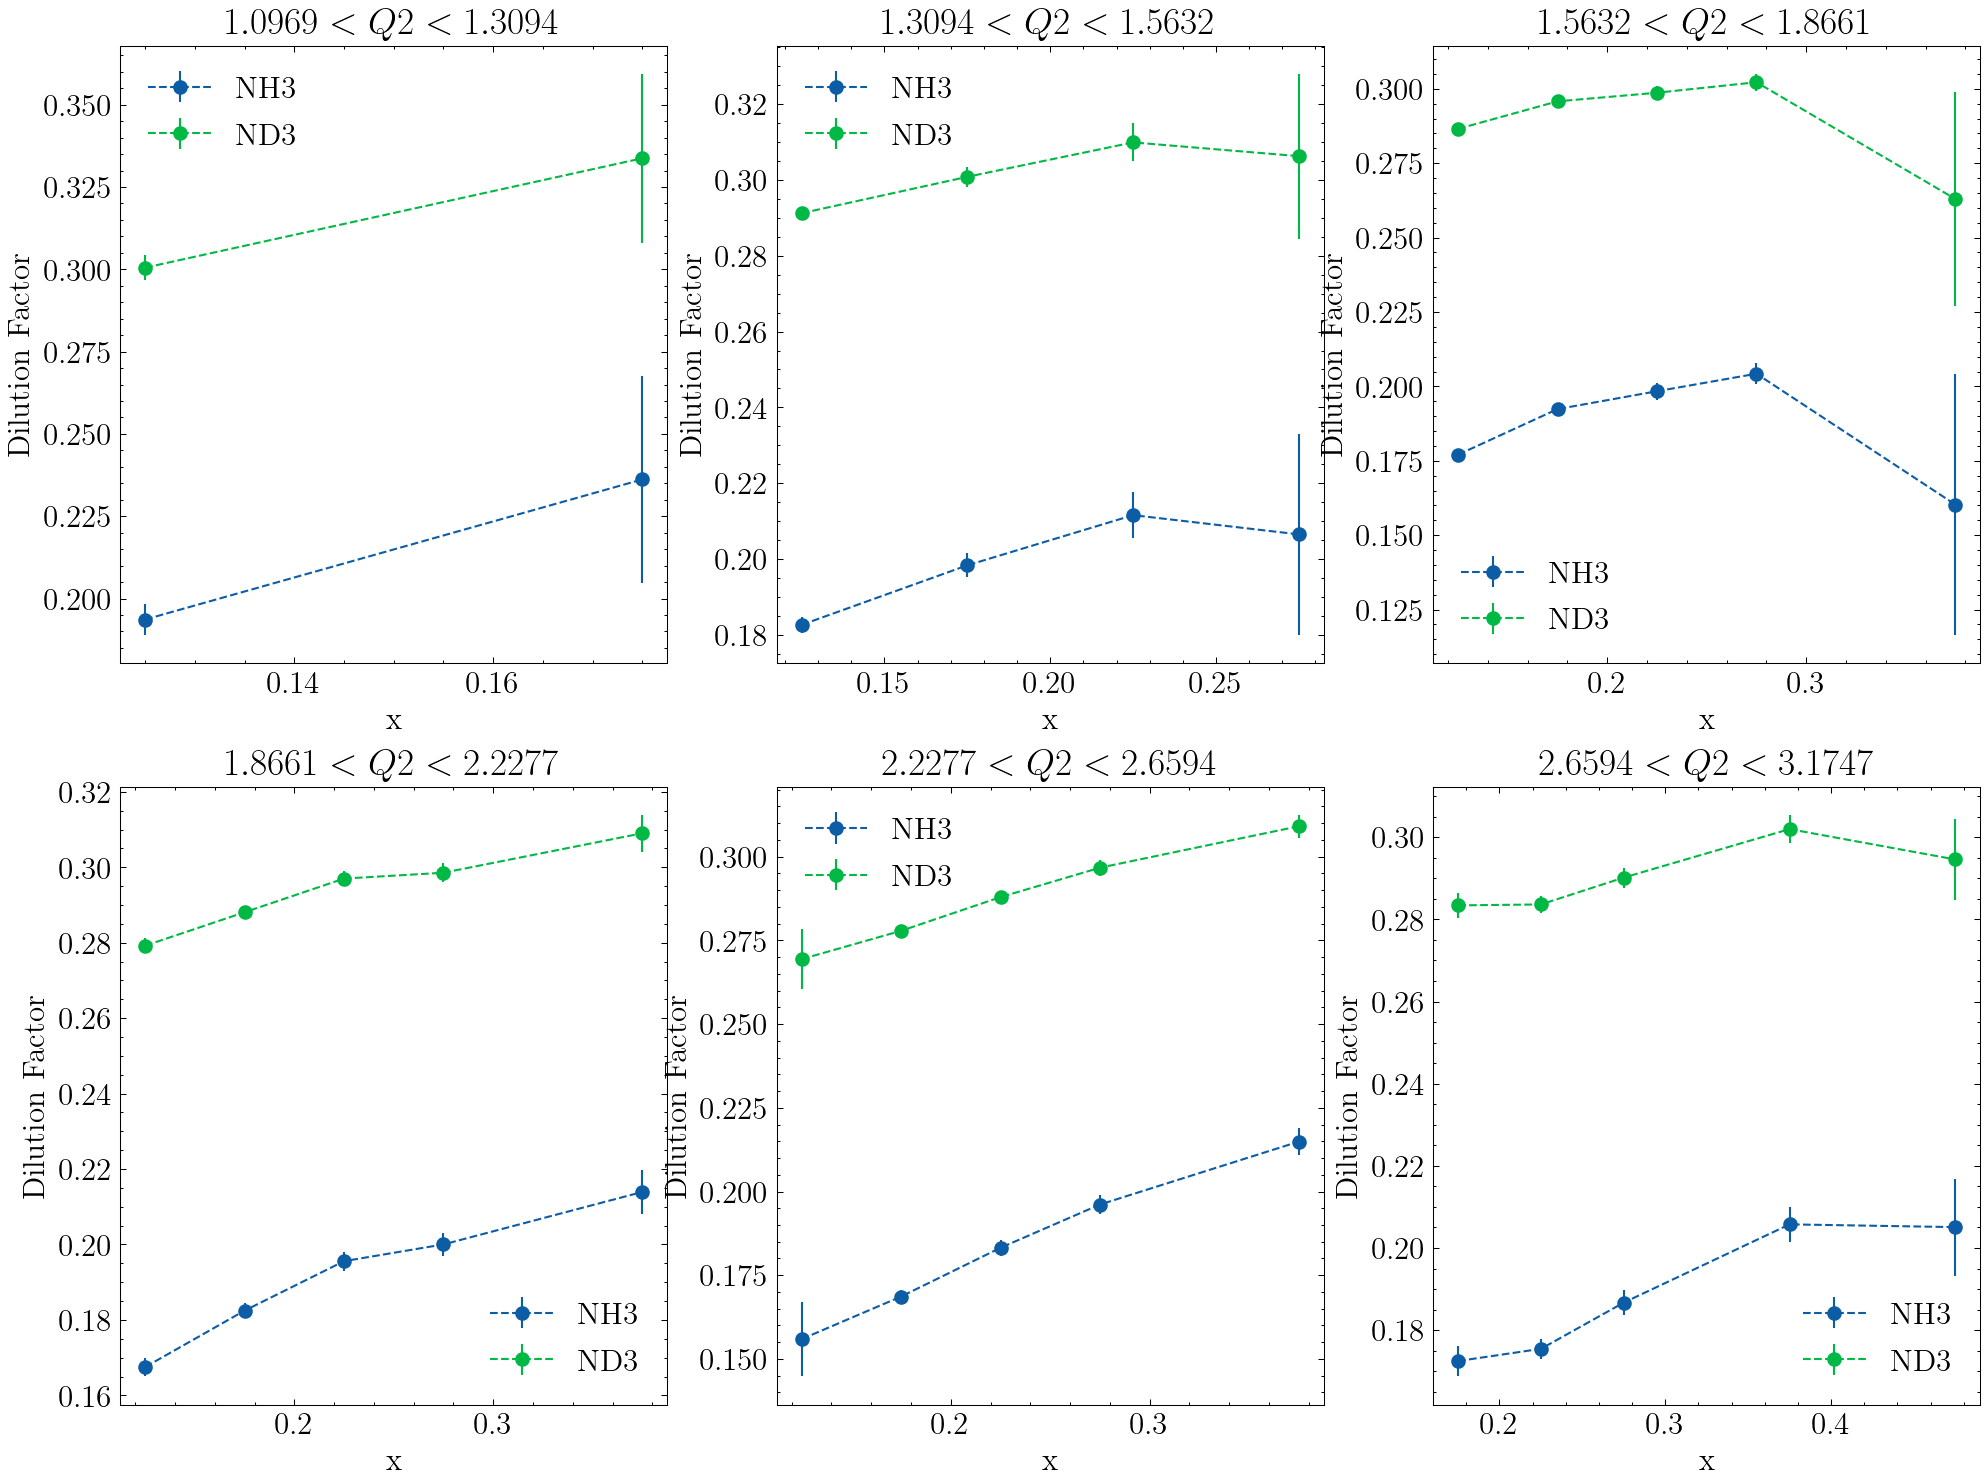

In [15]:
plt.rcParams['text.usetex'] = True
fig,axs=plt.subplots(2,3,figsize=(16,12),dpi=150)
for i,idx in enumerate([0,1,2,3,4,5]):
    r=int(np.floor(i/3))
    c=int(i%3)
    q2min = np.unique(df.Q2min)[idx]
    q2max = np.unique(df.Q2max)[idx]
    df_tmp = df[df.Q2min==q2min]
    axs[r,c].errorbar((df_tmp.xmin+df_tmp.xmax)/2,df_tmp.df_NH3,yerr=df_tmp.df_err_NH3,fmt="o--",label="NH3")
    axs[r,c].errorbar((df_tmp.xmin+df_tmp.xmax)/2,df_tmp.df_ND3,yerr=df_tmp.df_err_ND3,fmt="o--",label="ND3")
    axs[r,c].set_xlabel("x")
    axs[r,c].set_ylabel("Dilution Factor")
    axs[r,c].set_title("$ {} < Q2 < {} $".format(q2min,q2max))
    axs[r,c].legend()

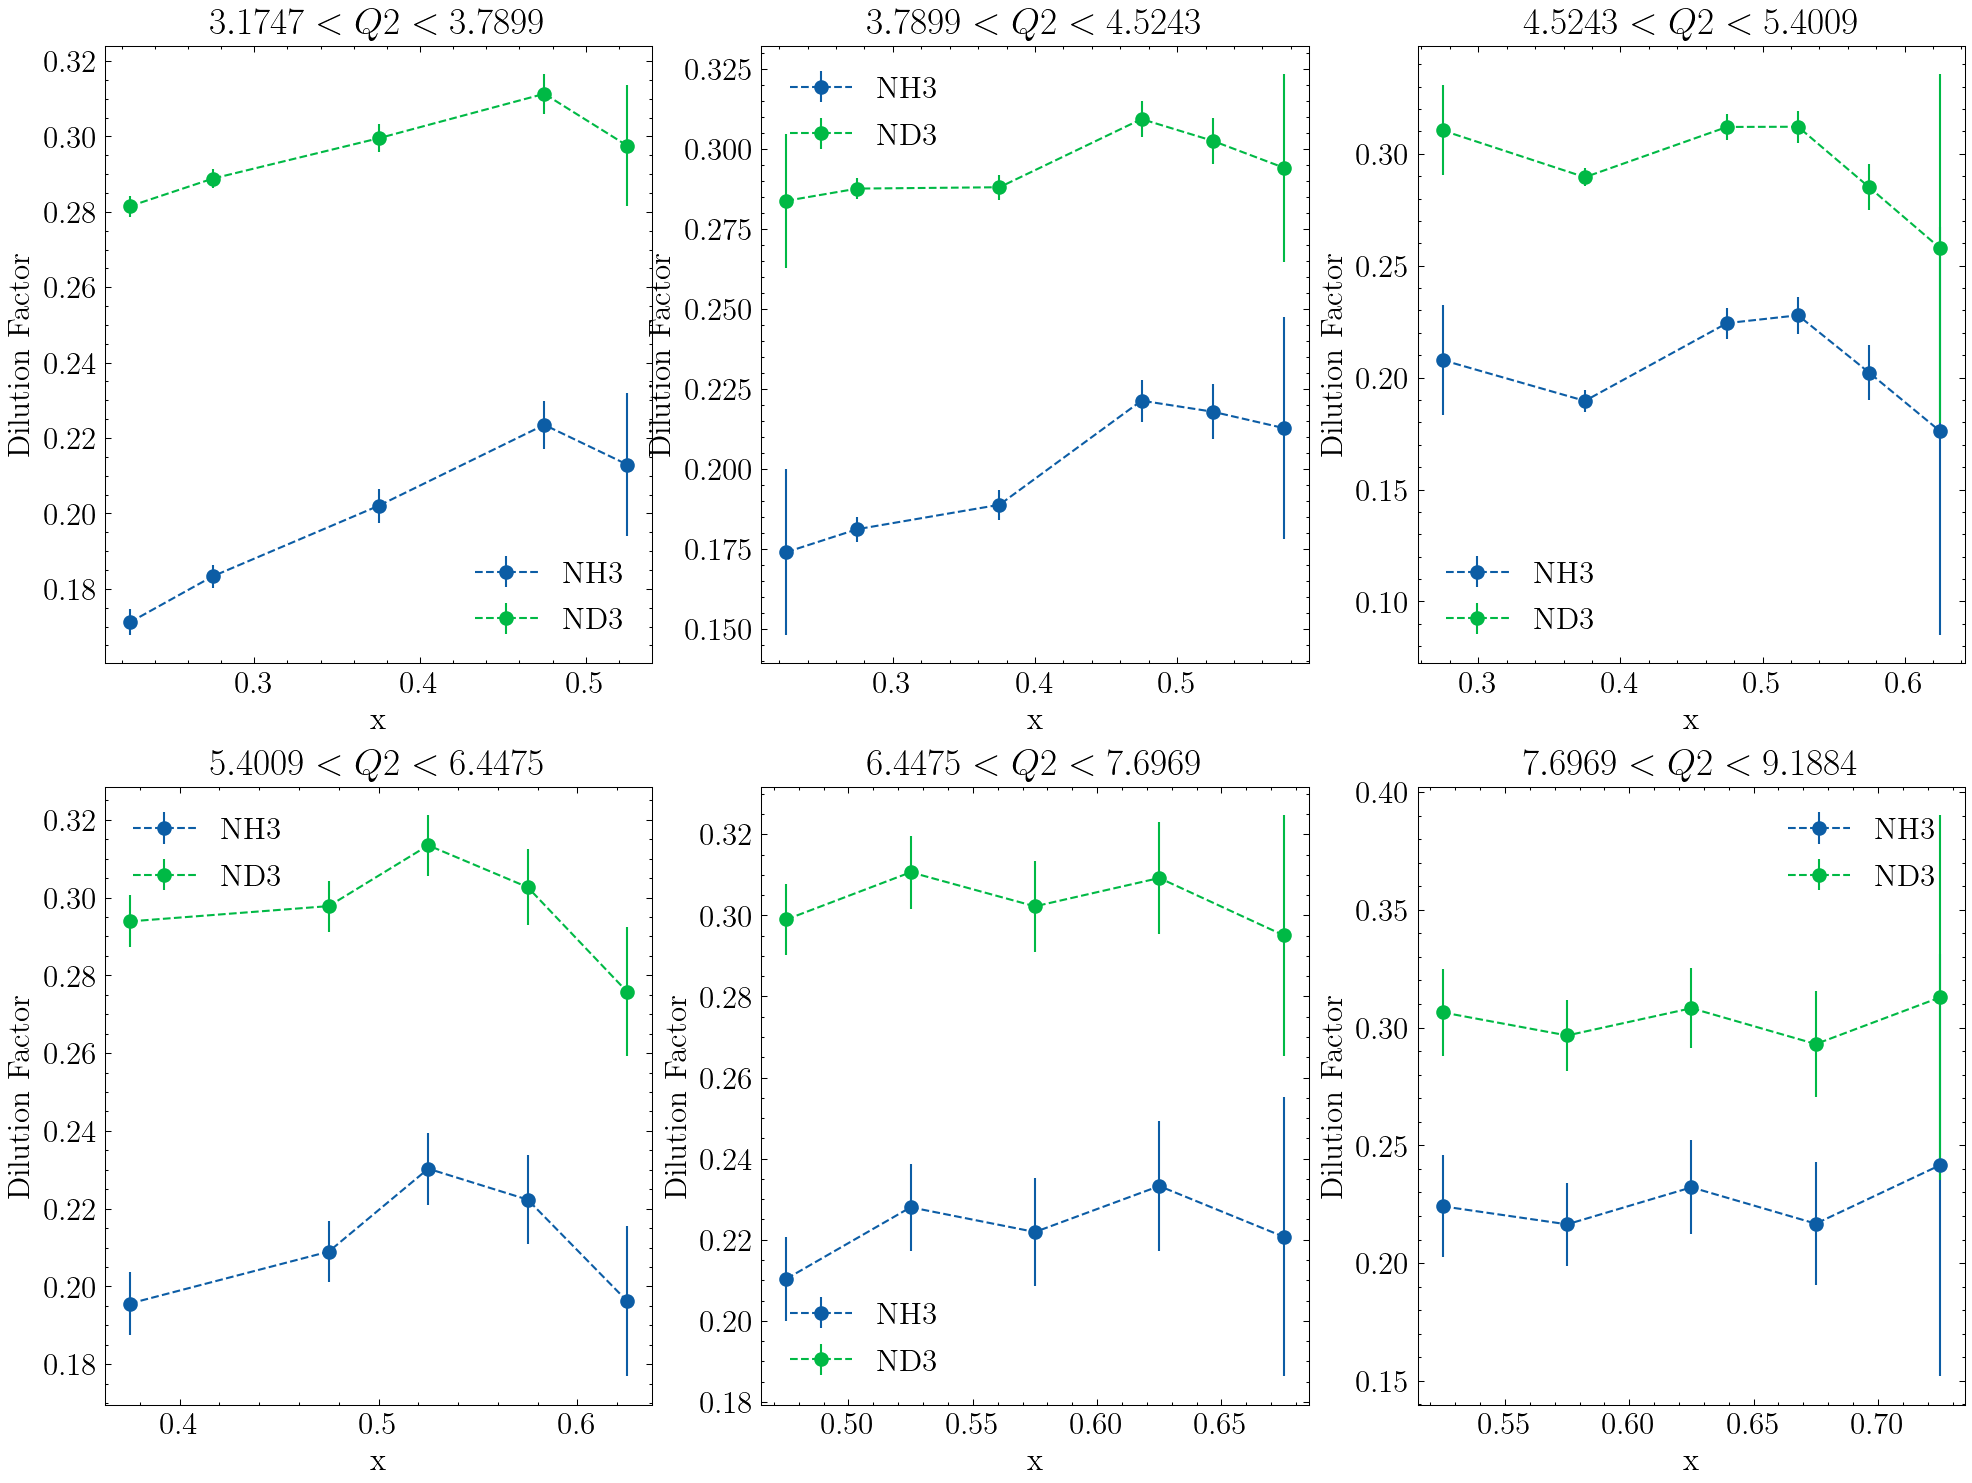

In [16]:
plt.rcParams['text.usetex'] = True
fig,axs=plt.subplots(2,3,figsize=(16,12),dpi=150)
for i,idx in enumerate([6,7,8,9,10,11]):
    r=int(np.floor(i/3))
    c=int(i%3)
    q2min = np.unique(df.Q2min)[idx]
    q2max = np.unique(df.Q2max)[idx]
    df_tmp = df[df.Q2min==q2min]
    axs[r,c].errorbar((df_tmp.xmin+df_tmp.xmax)/2,df_tmp.df_NH3,yerr=df_tmp.df_err_NH3,fmt="o--",label="NH3")
    axs[r,c].errorbar((df_tmp.xmin+df_tmp.xmax)/2,df_tmp.df_ND3,yerr=df_tmp.df_err_ND3,fmt="o--",label="ND3")
    axs[r,c].set_xlabel("x")
    axs[r,c].set_ylabel("Dilution Factor")
    axs[r,c].set_title("$ {} < Q2 < {} $".format(q2min,q2max))
    axs[r,c].legend()

In [17]:
df.to_csv("/work/clas12/users/gmat/rgc_dilution_factor_v4.csv")

In [51]:
display(df)

,Unnamed: 0,xmin,xmax,Q2min,Q2max,df_NH3,df_err_NH3,df_ND3,df_err_ND3,N_NH3,...,fcupgated_CH,fcupgated_MT,fcupgated_F,n_NH3,n_ND3,n_C,n_CH,n_MT,n_F,cookType
0,0,0.10,0.15,1.0969,1.3094,0.193626,0.004759,0.062317,0.001532,473039.0,...,64819.997838,64223.766528,0,0.722730,0.842995,0.851493,0.864995,0.008128,0,TBT
1,1,0.10,0.15,1.3094,1.5632,0.182605,0.002024,0.058770,0.000651,2722725.0,...,64819.997838,64223.766528,0,4.159902,4.985845,4.908593,4.931780,0.045404,0,TBT
2,2,0.10,0.15,1.5632,1.8661,0.177046,0.001773,0.056981,0.000571,3588454.0,...,64819.997838,64223.766528,0,5.482602,6.560554,6.525730,6.520796,0.059184,0,TBT
3,3,0.10,0.15,1.8661,2.2277,0.167498,0.002482,0.053908,0.000799,1882964.0,...,64819.997838,64223.766528,0,2.876878,3.428826,3.450000,3.415366,0.030861,0,TBT
4,4,0.10,0.15,2.2277,2.6594,0.155903,0.011142,0.050177,0.003586,95440.0,...,64819.997838,64223.766528,0,0.145818,0.173822,0.178511,0.174761,0.001573,0,TBT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,70,0.65,0.70,6.4475,7.6969,0.220725,0.034451,0.532723,0.083149,8755.0,...,64819.997838,64223.766528,0,0.013376,0.014997,0.014669,0.015319,0.000156,0,TBT
71,71,0.65,0.70,7.6969,9.1884,0.216722,0.026185,0.523063,0.063197,14800.0,...,64819.997838,64223.766528,0,0.022612,0.024835,0.025763,0.026797,0.000265,0,TBT
72,72,0.65,0.70,9.1884,10.9689,0.232724,0.037432,0.561685,0.090344,6882.0,...,64819.997838,64223.766528,0,0.010515,0.011299,0.011854,0.012542,0.000109,0,TBT
73,73,0.70,0.75,7.6969,9.1884,0.241621,0.089732,0.634939,0.235800,1141.0,...,64819.997838,64223.766528,0,0.001743,0.001861,0.001955,0.002083,0.000062,0,TBT


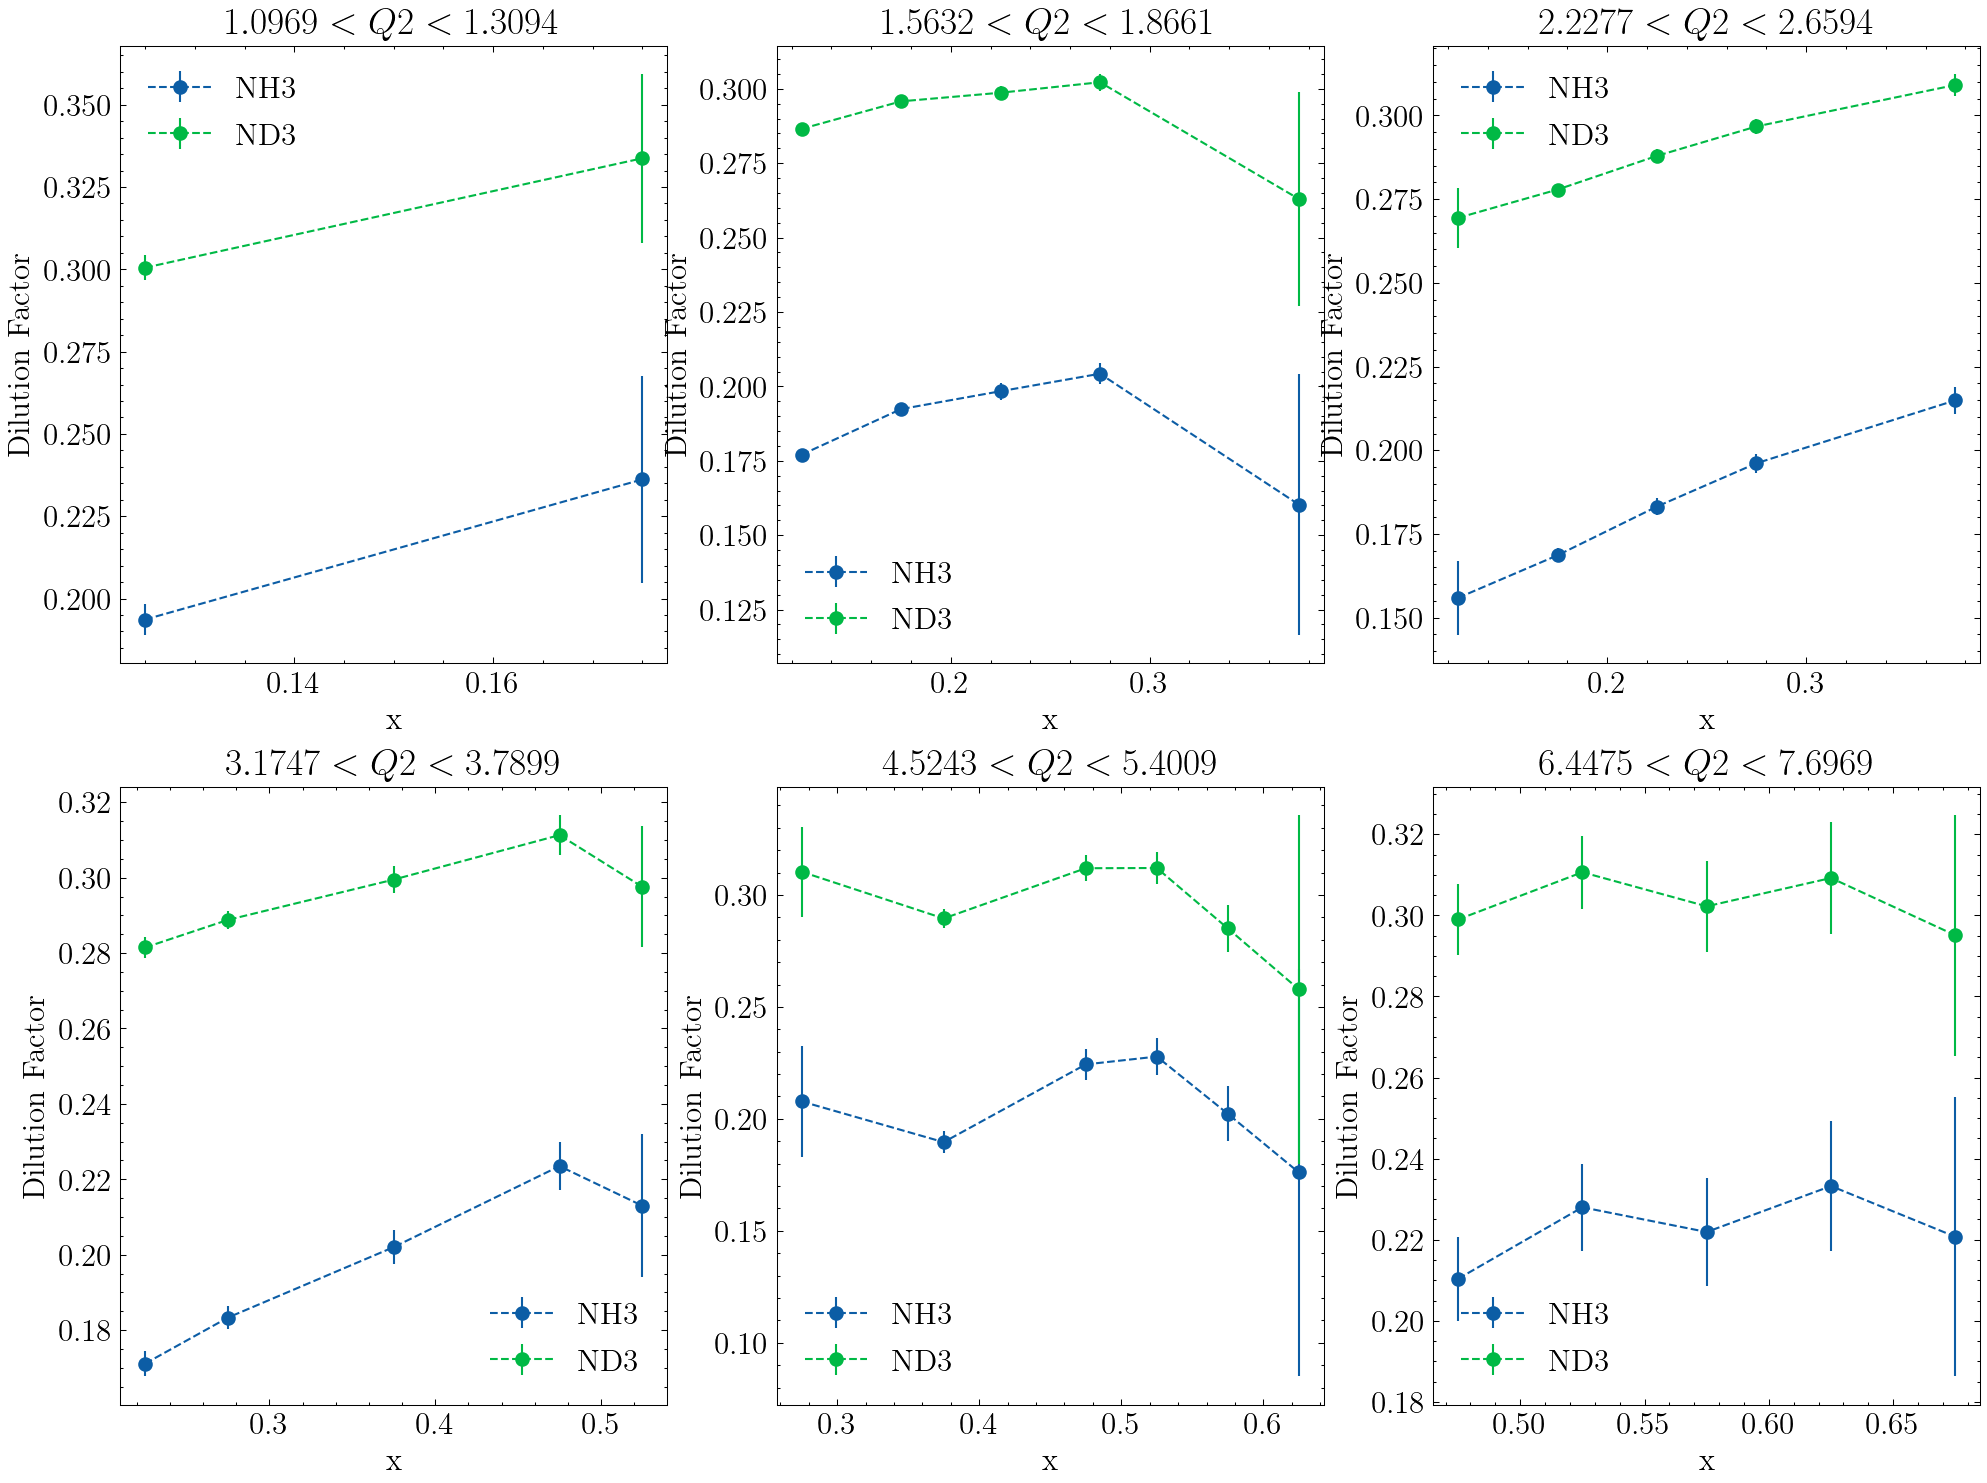

In [18]:
plt.rcParams['text.usetex'] = True
fig,axs=plt.subplots(2,3,figsize=(16,12),dpi=150)
for i,idx in enumerate([0,2,4,6,8,10]):
    r=int(np.floor(i/3))
    c=int(i%3)
    q2min = np.unique(df.Q2min)[idx]
    q2max = np.unique(df.Q2max)[idx]
    df_tmp = df[df.Q2min==q2min]
    axs[r,c].errorbar((df_tmp.xmin+df_tmp.xmax)/2,df_tmp.df_NH3,yerr=df_tmp.df_err_NH3,fmt="o--",label="NH3")
    axs[r,c].errorbar((df_tmp.xmin+df_tmp.xmax)/2,df_tmp.df_ND3,yerr=df_tmp.df_err_ND3,fmt="o--",label="ND3")
    axs[r,c].set_xlabel("x")
    axs[r,c].set_ylabel("Dilution Factor")
    axs[r,c].set_title("$ {} < Q2 < {} $".format(q2min,q2max))
    axs[r,c].legend()